<a href="https://colab.research.google.com/github/jear2412/MetodosLineales/blob/master/kNN-Ejemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#------ kNN 


import numpy as np
import scipy
import scipy.stats
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

sns.set_theme(style="darkgrid") 

In [2]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
# Data

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data" #datos de Iris - Ronald Fisher 

# Asignar nombres de columnas a los datos
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Leer datos
dataset = pd.read_csv(url, names=names)

In [6]:
dataset

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
# Class debe ser categorica

dataset.Class = pd.Categorical(dataset.Class)

dataset['code'] = dataset.Class.cat.codes

In [8]:
dataset

,sepal-length,sepal-width,petal-length,petal-width,Class,code
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [10]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width,code
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


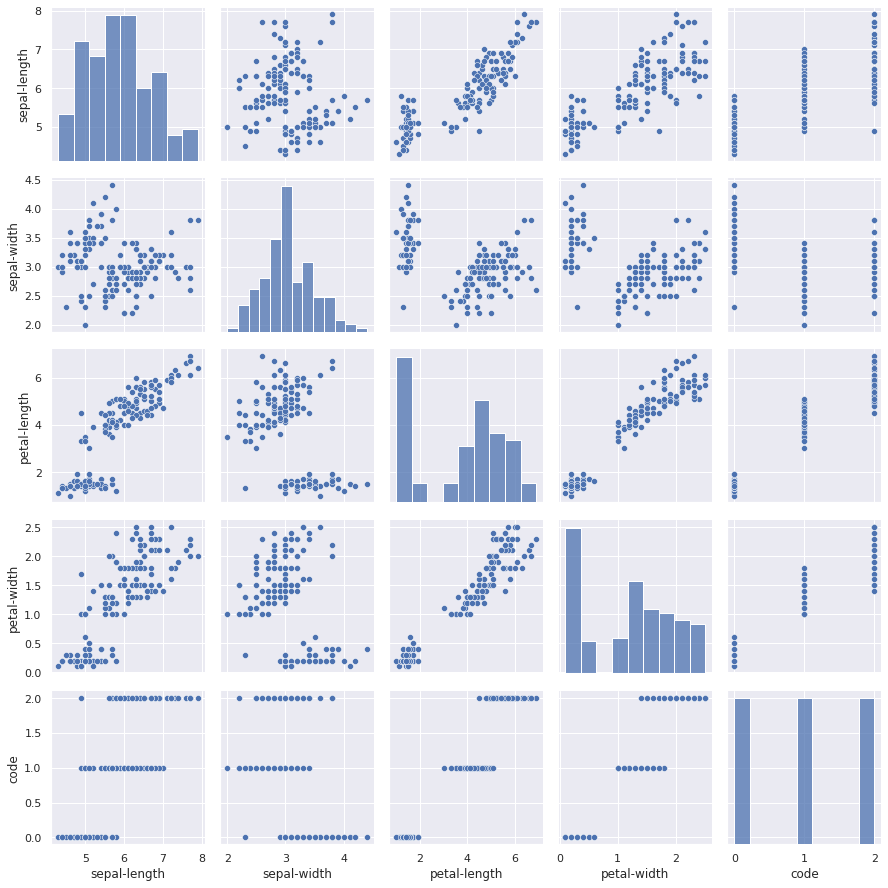

In [14]:
# Pair plot

sns.pairplot(dataset)
plt.tight_layout()

In [16]:
# X e y
X = dataset.iloc[:, :-2].values #tomar atributos
y = dataset.iloc[:, 5].values #tomar clases {0,1,2}

In [17]:
# Train y Test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#training 120 obs
#test 30 obs

In [18]:
# Preprocesar
# Escalamiento de los datos

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
#Clasificador KNN

from sklearn.neighbors import KNeighborsClassifier

k=5 #numero de vecinos 

classifier = KNeighborsClassifier(n_neighbors=k, algorithm='brute') #inicializamos el clasificador 
classifier.fit(X_train, y_train) #entrenamos el clasificador

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [21]:
# predicciones del clasificador en el conjunto de prueba

y_pred = classifier.predict(X_test)


In [23]:
#Evaluamos el clasificador

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred), '\n') #Matriz de Confusion
print(classification_report(y_test, y_pred)) #Metricas como precision, recall, f1


[[ 9  0  0]
 [ 0  9  1]
 [ 0  0 11]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.90      0.95        10
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [24]:
#Grafico de los errores para valores de k

errortrain= [] #errores en el entrenamiento 
errorpred= [] #errores en la prueba

# Calcular errores para los valores de k entre 1 y 50
# Para cada valor de k ajustaremos / entrenar el clasificador 
# tipo de error= cuantas veces se equivoca

for i in range(1, 50): #para varios valores de k

    knn = KNeighborsClassifier(n_neighbors=i, algorithm='brute') #inicializar el clasificador
    knn.fit(X_train, y_train) #entrenando el clasificador
    
    #errores en entrenamiento
    etrain= knn.predict(X_train)
    errortrain.append( np.mean(  etrain!=y_train    )   )

    #errores en prueba
    pred_i = knn.predict(X_test)
    errorpred.append(np.mean(pred_i != y_test))
    


Text(0, 0.5, 'Error')

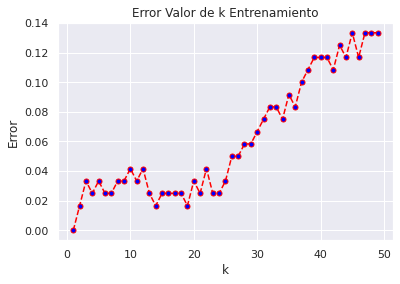

In [25]:
#Grafico error de entrenamiento
# Cual es el mejor valor de k? 

plt.plot(range(1, 50), errortrain, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=5)
plt.title('Error Valor de k Entrenamiento')
plt.xlabel('k')
plt.ylabel('Error')

Text(0, 0.5, 'Error')

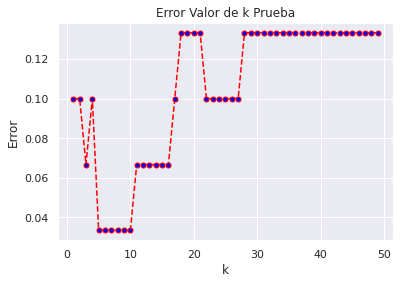

In [27]:
#Grafico error de prueba
# Cual es el mejor valor de k?

plt.plot(range(1, 50), errorpred, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=5)
plt.title('Error Valor de k Prueba')
plt.xlabel('k')
plt.ylabel('Error')

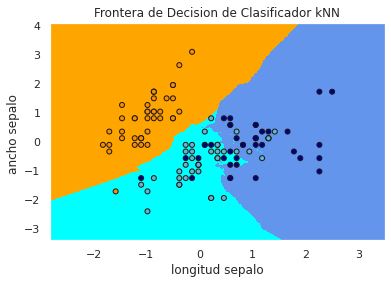

In [28]:
#Frontera de Decision usando los primeros dos atributos

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X=X_train[:,0:2]
y=y_train


k=11
h = .02  # Tamano de paso


# Crear mapas de colores
# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

for weights in ['uniform']:
    # we create an instance of Neighbours Classifier and fit the data.
    # creamos una instancia del clasificador de kNN y j
    clf = KNeighborsClassifier(k, weights=weights, algorithm='brute')
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].

    #Graficamos la frontera de decision. Para ello se asigna un color a cada punto
    # en la cuadricula [x_min, x_max]x[y_min, y_max].

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()

    plt.pcolormesh(xx, yy, Z, cmap=cmap_light )

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=25)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('longitud sepalo')
    plt.ylabel('ancho sepalo ')
    plt.title( 'Frontera de Decision de Clasificador kNN'  )
 
plt.show()



